## Table of Contents:
* [Introduction](#intro)
* [Exploratory Data Analysis](#first-bullet)
* [Text Data Preprocessing](#second-bullet)
* [Modelling - Logistic Regression](#third-bullet)
* [Modelling - PCA and Decision Tree Classifier Using Pipeline](#fourth-bullet)
* [Modelling - Model Evaluation](#fifth-bullet)
* [Conclusion](#conc)

## Introduction <a class="anchor" id="intro"></a>



## Exploratory Data Analysis <a class="anchor" id="first-bullet"></a>

First, let's load the data and understand what we are working with.

Perform EDA on the data and mention 3-4 observations from which you can draw actionable insights. In your EDA, you may consider creating a data dictionary, basic statistical analysis, data visualizations, data cleaning and preprocessing to prepare the data for modeling.

In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [2]:
reviews = pd.read_csv('data/Hotel_Reviews.csv', index_col=0)

In [3]:
reviews.head()

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,...,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,0,...,0,1,1,0,0,0,0,0,1,6
1,194,7.7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,0,...,0,0,1,0,0,0,0,0,1,4
2,194,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,3,...,0,0,1,0,0,0,0,0,1,3
3,194,7.7,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,3,...,0,0,1,0,0,0,0,0,1,3
4,194,7.7,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,0,10,...,0,1,1,0,0,0,0,0,1,2


In [4]:
pd.options.display.max_columns = 100
pd.options.display.max_columns

100

In [5]:
reviews.head()

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,Longitude,Day,Month,Year,Reviewer_Nationality_Australia,Reviewer_Nationality_Ireland,Reviewer_Nationality_UAE,Reviewer_Nationality_UK,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,0,52.360576,4.915968,3,8,2017,0,0,0,0,0,1,1,0,0,0,0,0,1,6
1,194,7.7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,0,52.360576,4.915968,3,8,2017,0,1,0,0,0,0,1,0,0,0,0,0,1,4
2,194,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,3,52.360576,4.915968,31,7,2017,1,0,0,0,0,0,1,0,0,0,0,0,1,3
3,194,7.7,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,3,52.360576,4.915968,31,7,2017,0,0,0,1,0,0,1,0,0,0,0,0,1,3
4,194,7.7,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,0,10,52.360576,4.915968,24,7,2017,0,0,0,0,0,1,1,0,0,0,0,0,1,2


In [6]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515738 entries, 0 to 515737
Data columns (total 29 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Additional_Number_of_Scoring                515738 non-null  int64  
 1   Average_Score                               515738 non-null  float64
 2   Negative_Review                             515738 non-null  object 
 3   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 4   Total_Number_of_Reviews                     515738 non-null  int64  
 5   Positive_Review                             515738 non-null  object 
 6   Review_Total_Positive_Word_Counts           515738 non-null  int64  
 7   Total_Number_of_Reviews_Reviewer_Has_Given  515738 non-null  int64  
 8   Reviewer_Score                              515738 non-null  int64  
 9   Days_Since_Review                           515738 non-null  int64  
 10  L

In [7]:
reviews.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,Longitude,Day,Month,Year,Reviewer_Nationality_Australia,Reviewer_Nationality_Ireland,Reviewer_Nationality_UAE,Reviewer_Nationality_UK,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,0.570006,354.441932,49.432419,2.893479,15.680221,6.486660,2016.120761,0.042048,0.028749,0.019845,0.475524,0.068711,0.365121,0.110936,0.116627,0.508594,0.072143,0.116199,0.075502,0.810059,2.362122
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,0.495075,208.928124,3.460237,4.667477,8.864491,3.351779,0.687567,0.200700,0.167101,0.139469,0.499401,0.252963,0.481465,0.314053,0.320976,0.499927,0.258725,0.320463,0.264199,0.392255,1.646808
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,0.000000,0.000000,41.328376,-0.369758,1.000000,1.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,0.000000,175.000000,48.214066,-0.143372,8.000000,4.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,1.000000,353.000000,51.499981,0.019886,16.000000,7.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,1.000000,527.000000,51.516288,4.841163,23.000000,9.000000,2017.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,1.000000,730.000000,52.400181,16.429233,31.000000,12.000000,2017.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000


In [8]:
# checking for duplicate rows
reviews.duplicated().sum()

539

In [9]:
# check that duplicates are unique
reviews.loc[reviews.duplicated(), :].duplicated().sum()

0

In [10]:
# double checking that duplicates are unique
reviews.loc[reviews.duplicated(), :]

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,Longitude,Day,Month,Year,Reviewer_Nationality_Australia,Reviewer_Nationality_Ireland,Reviewer_Nationality_UAE,Reviewer_Nationality_UK,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
22084,83,8.3,Nothing,2,549,Good Service,3,5,1,0,48.849143,2.339712,3,8,2017,0,0,0,0,0,1,0,0,0,0,1,0,0,4
23704,728,8.9,none,2,3168,good location and super nice staff room is bi...,13,39,1,159,51.528677,-0.128349,25,2,2017,0,0,0,0,0,1,0,0,1,0,0,0,0,1
61876,300,9.0,No Negative,0,1254,The attention received by Sebastian and his t...,12,4,1,7,51.517167,-0.129053,27,7,2017,0,0,0,0,0,1,0,0,1,0,0,0,1,2
68967,11,6.8,Location is very old not invested in past yea...,41,165,Location is central accessible by train parki...,12,24,0,41,48.887128,2.314205,23,6,2017,0,0,0,0,0,1,0,0,0,0,1,0,0,1
68968,11,6.8,This hotel I don t think so is 4 star B B hav...,93,165,Nothing,2,10,0,98,48.887128,2.314205,27,4,2017,0,0,0,1,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445869,251,8.8,Fitness club needs more tools,6,3667,No Positive,0,34,1,358,48.191339,16.316587,10,8,2016,0,0,0,0,0,1,0,0,0,0,0,1,1,4
470439,493,9.0,No Negative,0,4192,Excellent,2,33,1,148,45.460860,9.189022,8,3,2017,0,0,0,0,0,1,0,0,0,1,0,0,0,1
471973,311,8.3,Nothing,2,3720,Location and staff,4,20,0,718,45.461177,9.191047,16,8,2015,0,0,1,0,0,0,0,0,0,1,0,0,1,2
489215,904,8.1,The location is too far from city center 1 km...,29,16670,Excellent breakfast variaty of goods wifi goo...,16,11,0,577,45.533137,9.171102,4,1,2016,0,0,0,0,0,1,0,0,0,1,0,0,1,1


In [11]:
reviews.loc[68967]['Negative_Review']

' Location is very old not invested in past years at some time this hotel must have seen glory but today it badly needs renovation AC was not working on a day of 40 deg in Paris one can imagine '

In [12]:
reviews.loc[reviews['Negative_Review'] == ' Location is very old not invested in past years at some time this hotel must have seen glory but today it badly needs renovation AC was not working on a day of 40 deg in Paris one can imagine ']

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,Longitude,Day,Month,Year,Reviewer_Nationality_Australia,Reviewer_Nationality_Ireland,Reviewer_Nationality_UAE,Reviewer_Nationality_UK,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
68936,11,6.8,Location is very old not invested in past yea...,41,165,Location is central accessible by train parki...,12,24,0,41,48.887128,2.314205,23,6,2017,0,0,0,0,0,1,0,0,0,0,1,0,0,1
68967,11,6.8,Location is very old not invested in past yea...,41,165,Location is central accessible by train parki...,12,24,0,41,48.887128,2.314205,23,6,2017,0,0,0,0,0,1,0,0,0,0,1,0,0,1


In [13]:
# triple checking
reviews.loc[445869]['Negative_Review']

' Fitness club needs more tools'

In [14]:
reviews.loc[reviews['Negative_Review'] == ' Fitness club needs more tools']

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,Longitude,Day,Month,Year,Reviewer_Nationality_Australia,Reviewer_Nationality_Ireland,Reviewer_Nationality_UAE,Reviewer_Nationality_UK,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
445868,251,8.8,Fitness club needs more tools,6,3667,No Positive,0,34,1,358,48.191339,16.316587,10,8,2016,0,0,0,0,0,1,0,0,0,0,0,1,1,4
445869,251,8.8,Fitness club needs more tools,6,3667,No Positive,0,34,1,358,48.191339,16.316587,10,8,2016,0,0,0,0,0,1,0,0,0,0,0,1,1,4


In [15]:
# dropping duplicates
reviews.drop_duplicates(inplace=True)

In [16]:
# checking that the right number of rows were dropped
reviews.shape

(515199, 29)

In [17]:
# resetting the index since dropping rows messes it up
reviews.reset_index(drop=True, inplace=True)

In [18]:
# no more duplicates
reviews.duplicated().sum()

0

In [19]:
# no nulls
reviews.isnull().sum()

Additional_Number_of_Scoring                  0
Average_Score                                 0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Days_Since_Review                             0
Latitude                                      0
Longitude                                     0
Day                                           0
Month                                         0
Year                                          0
Reviewer_Nationality_Australia                0
Reviewer_Nationality_Ireland                  0
Reviewer_Nationality_UAE                      0
Reviewer_Nationality_UK                       0
Reviewer_Nationality_USA                      0
Reviewer_Nationality_Other              

In [20]:
# I'm going to drop the columns Latitude, Longitude, Day, Month, and Year since I think these should be redundant with the Address columns and Days_Since_Review
reviews.drop(columns=['Latitude', 'Longitude', 'Day', 'Month', 'Year'], inplace=True)

In [21]:
# checking that they're gone
reviews.head()

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Reviewer_Nationality_Australia,Reviewer_Nationality_Ireland,Reviewer_Nationality_UAE,Reviewer_Nationality_UK,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,6
1,194,7.7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,4
2,194,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,3,1,0,0,0,0,0,1,0,0,0,0,0,1,3
3,194,7.7,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,3,0,0,0,1,0,0,1,0,0,0,0,0,1,3
4,194,7.7,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,0,10,0,0,0,0,0,1,1,0,0,0,0,0,1,2


In [22]:
# checking out correlations between columns to detect collinearity
reviews.corr(numeric_only=True)

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Reviewer_Nationality_Australia,Reviewer_Nationality_Ireland,Reviewer_Nationality_UAE,Reviewer_Nationality_UK,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
Additional_Number_of_Scoring,1.000000,-0.153242,0.029170,0.824897,-0.053160,-0.071976,-0.055799,0.011968,-0.037974,0.015903,-0.026479,0.212456,-0.069782,-0.165771,-0.004750,-0.186310,0.440744,-0.128958,-0.252548,-0.170143,0.000216,-0.109163
Average_Score,-0.153242,1.000000,-0.112356,-0.179689,0.106636,0.036519,0.330656,-0.014024,0.024623,-0.021031,0.011891,-0.034281,0.069325,-0.007248,-0.006875,0.082969,-0.106639,0.014745,0.009099,0.083632,0.082238,0.013839
Review_Total_Negative_Word_Counts,0.029170,-0.112356,1.000000,0.035086,0.119703,0.003221,-0.303305,-0.043208,-0.009488,0.004804,-0.001426,0.011358,0.002676,-0.010487,0.010654,-0.005184,0.023333,-0.009833,-0.022026,-0.014253,-0.006943,0.038282
Total_Number_of_Reviews,0.824897,-0.179689,0.035086,1.000000,-0.030138,-0.024923,-0.067487,0.007249,-0.021712,0.022350,-0.016352,0.062690,-0.048212,-0.033688,0.103158,-0.068015,0.106822,0.088157,-0.229625,-0.050871,0.013752,-0.034962
Review_Total_Positive_Word_Counts,-0.053160,0.106636,0.119703,-0.030138,1.000000,0.026572,0.199379,-0.045060,0.028072,0.006978,-0.020246,-0.008110,0.067500,-0.035286,0.029828,0.030898,-0.061645,0.005518,0.018831,0.015440,0.076158,0.054614
Total_Number_of_Reviews_Reviewer_Has_Given,-0.071976,0.036519,0.003221,-0.024923,0.026572,1.000000,-0.013274,0.035128,0.024631,-0.030705,0.017738,-0.171913,-0.048013,0.198798,-0.009126,0.001791,-0.086534,0.073123,0.017719,0.079322,-0.115456,-0.008950
Reviewer_Score,-0.055799,0.330656,-0.303305,-0.067487,0.199379,-0.013274,1.000000,-0.002455,0.017343,0.004752,-0.032997,0.049173,0.064326,-0.084102,0.015775,0.031142,-0.043349,-0.007784,0.010154,0.020754,0.101049,-0.015212
Days_Since_Review,0.011968,-0.014024,-0.043208,0.007249,-0.045060,0.035128,-0.002455,1.000000,-0.003734,-0.012991,0.010736,0.009159,-0.016785,0.002267,-0.020848,-0.003561,0.006761,-0.009242,0.010806,0.012312,-0.006415,0.002142
Reviewer_Nationality_Australia,-0.037974,0.024623,-0.009488,-0.021712,0.028072,0.024631,0.017343,-0.003734,1.000000,-0.036035,-0.029806,-0.199510,-0.056843,-0.158786,-0.011050,0.011438,-0.049313,0.041631,0.041483,0.001611,0.054326,0.069482
Reviewer_Nationality_Ireland,0.015903,-0.021031,0.004804,0.022350,0.006978,-0.030705,0.004752,-0.012991,-0.036035,1.000000,-0.024488,-0.163910,-0.046700,-0.130453,0.051164,0.014631,-0.012127,-0.020763,-0.014339,-0.017996,0.014617,0.006680


<Axes: >

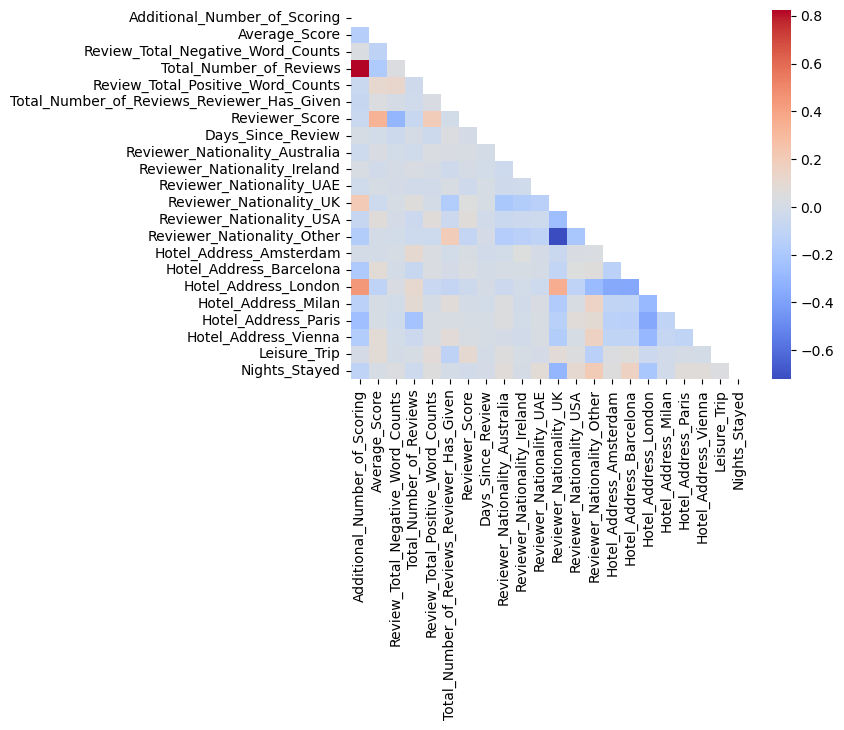

In [23]:
# more easy to look at this in a heatmap
sns.heatmap(reviews.corr(numeric_only = True), cmap='coolwarm', mask=np.triu(reviews.corr(numeric_only=True)))

In [24]:
# Total_Number_of_Reviews correlates strongly with Additional_Number_of_Scoring, which makes sense
# should I drop one of them?
np.corrcoef(reviews['Total_Number_of_Reviews'], reviews['Reviewer_Score'])

array([[ 1.        , -0.06748664],
       [-0.06748664,  1.        ]])

In [25]:
np.corrcoef(reviews['Additional_Number_of_Scoring'], reviews['Reviewer_Score'])

array([[ 1.        , -0.05579928],
       [-0.05579928,  1.        ]])

In [26]:
# they both show very low correlations with the target variable - I'll drop the one with slighly less correlation
reviews.drop(columns='Additional_Number_of_Scoring', inplace=True)

<Axes: >

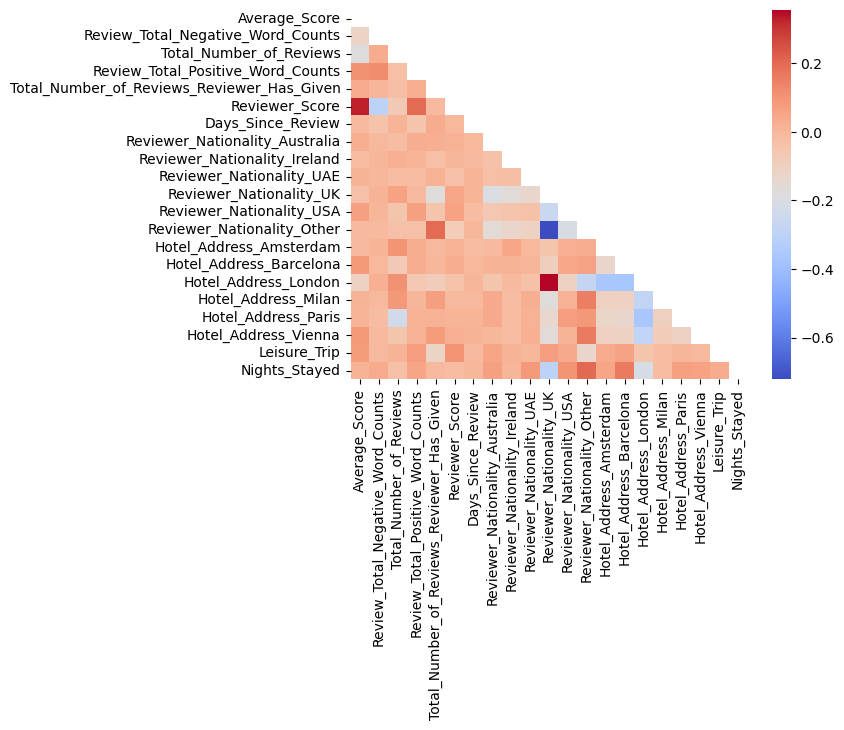

In [27]:
# looking at the heatmap again
sns.heatmap(reviews.corr(numeric_only = True), cmap='coolwarm', mask=np.triu(reviews.corr(numeric_only=True)))

In [28]:
# the highest positive correlation is now ~0.3, not very high
# the highest negative correlation is pretty significant though at ~0.7
# can I drop one of Reviewer_Nationality_UK or Reviewer_Nationality_Other?
np.corrcoef(reviews['Reviewer_Nationality_Other'], reviews['Reviewer_Score'])

array([[ 1.        , -0.08410182],
       [-0.08410182,  1.        ]])

In [29]:
np.corrcoef(reviews['Reviewer_Nationality_UK'], reviews['Reviewer_Score'])

array([[1.        , 0.04917252],
       [0.04917252, 1.        ]])

In [30]:
# again they're both not very correlated with the target variable
# I'll drop Reviewer_Nationality_Other this time since I should drop one of these dummied variables anyway and this catchall makes the most sense to drop
reviews.drop(columns='Reviewer_Nationality_Other', inplace=True)

<Axes: >

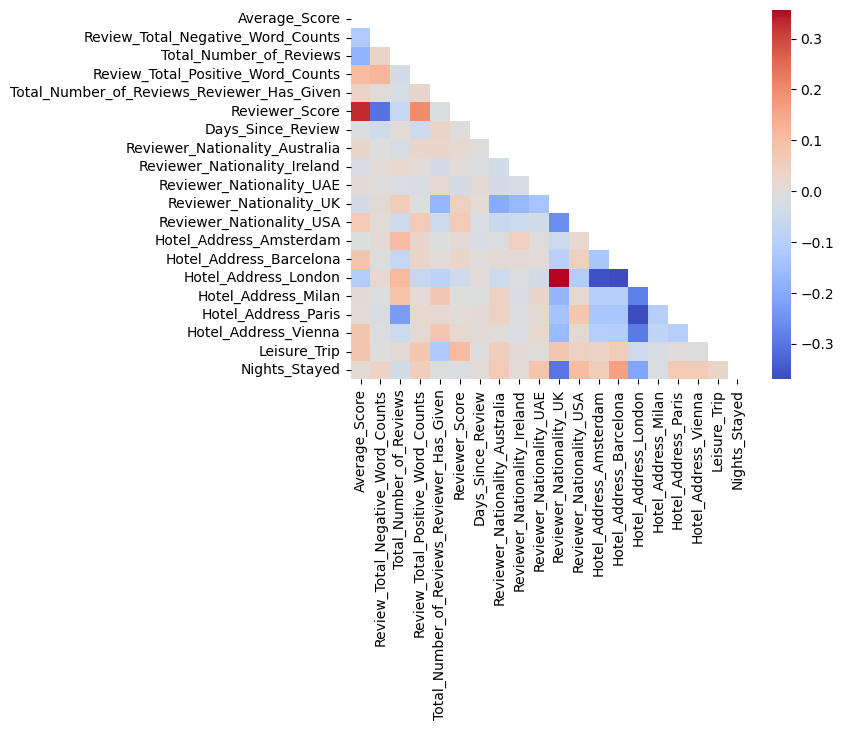

In [31]:
sns.heatmap(reviews.corr(numeric_only = True), cmap='coolwarm', mask=np.triu(reviews.corr(numeric_only=True)))

In [32]:
# checking for multicollinearity

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = reviews.drop(columns=['Reviewer_Score', 'Negative_Review', 'Positive_Review'])
X_withconstant = sm.add_constant(X)

for i, col in enumerate(X_withconstant):
    print(i)
    print(col)
    print(variance_inflation_factor(X_withconstant, i))
    print('\n')


0
const


/Users/yael/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


0.0


1
Average_Score
1.0867875682214212


2
Review_Total_Negative_Word_Counts
1.0355668169187966


3
Total_Number_of_Reviews
1.1175520048075496


4
Review_Total_Positive_Word_Counts
1.0468765870432588


5
Total_Number_of_Reviews_Reviewer_Has_Given
1.0691006156627023


6
Days_Since_Review
1.0064618298453434


7
Reviewer_Nationality_Australia
1.0813012363496837


8
Reviewer_Nationality_Ireland
1.067446009922851


9
Reviewer_Nationality_UAE
1.037630705047725


10
Reviewer_Nationality_UK
1.5512235546532869


11
Reviewer_Nationality_USA
1.1386031028661745


12
Hotel_Address_Amsterdam


/Users/yael/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


inf


13
Hotel_Address_Barcelona
inf


14
Hotel_Address_London
inf


15
Hotel_Address_Milan
inf


16
Hotel_Address_Paris
inf


17
Hotel_Address_Vienna
inf


18
Leisure_Trip
1.051192631413314


19
Nights_Stayed
1.1513288550078025




In [33]:
# as far as I can tell everything looks good now
# what's interesting to note are the correlations between Review_Total_Positive_Word_Counts, Review_Total_Negative_Word_Counts and Reviewer_Score
np.corrcoef(reviews['Review_Total_Positive_Word_Counts'], reviews['Reviewer_Score'])

array([[1.        , 0.19937915],
       [0.19937915, 1.        ]])

In [34]:
np.corrcoef(reviews['Review_Total_Negative_Word_Counts'], reviews['Reviewer_Score'])

array([[ 1.        , -0.30330543],
       [-0.30330543,  1.        ]])

In [35]:
# reviewer score is slightly positively correlated with positive word count and more negatively correlated with negative word count
# this makes sense, but I would maybe have expected these to be stronger correlations
# I'll make a new column that's the difference of positive to negative word counts and see if it correlates any more strongly
reviews['Positive_To_Negative_Word_Count_Difference'] = reviews['Review_Total_Positive_Word_Counts'] - reviews['Review_Total_Negative_Word_Counts']

In [36]:
reviews.describe()['Positive_To_Negative_Word_Count_Difference']

count    515199.000000
mean         -0.762222
std          34.672011
min        -402.000000
25%         -10.000000
50%           2.000000
75%          12.000000
max         384.000000
Name: Positive_To_Negative_Word_Count_Difference, dtype: float64

In [37]:
np.corrcoef(reviews['Positive_To_Negative_Word_Count_Difference'], reviews['Reviewer_Score'])

array([[1.        , 0.38514139],
       [0.38514139, 1.        ]])

In [38]:
np.corrcoef(reviews['Positive_To_Negative_Word_Count_Difference'], reviews['Review_Total_Positive_Word_Counts'])

array([[1.        , 0.52636877],
       [0.52636877, 1.        ]])

In [39]:
np.corrcoef(reviews['Positive_To_Negative_Word_Count_Difference'], reviews['Review_Total_Negative_Word_Counts'])

array([[ 1.        , -0.78113515],
       [-0.78113515,  1.        ]])

In [40]:
# this new column only correlates to reviewer score a little more strongly and creates collinearity with the columns it was created from
# doesn't seem like this worked well, let's drop the column
reviews.drop(columns='Positive_To_Negative_Word_Count_Difference', inplace=True)

#### In summary: 
1. Average rating is correlated with reviewer score - 0.330656 - which makes sense; a single person's recommendation should match up with the overall rating of the hotel
2. Longer positive reviews somewhat correlate with reviewer score, and this positive correlation makes sense
3. Longer negative reviews more strongly correlate to reviewer score than positive reviews do - it seems that when people feel more strongly about the negative aspects of their stay they will write more
4. None of the other numeric columns correlate much with reviewer score at all (highest of the remaining columns was 0.101049, which was whether or not the guest was there on a leisure trip)

It seems like the bulk of the predictive power of a model on this data would come from the text analysis and processing, so let's move on to that step. 

## Text Data Preprocessing <a class="anchor" id="second-bullet"></a>

Next, the text data needs to be processed for modelling.

Split the data into train and test sets and transform the positive and negative review columns using a CountVectorizer. Consider the following:

What tokenizer and text cleaning steps do you include?

Using the vectorizer, maximize the number of features at 500 and make sure that tokens used <10 times are dropped from the vocabulary.

This process may be done on the positive and negative review columns separately and then the resulting arrays merged with the original numeric features to form the final train and test data frames ready for modelling. In your column names, make sure you mark which words are coming from the positive vs negative reviews (you can use a prefix such as pos_ and neg_).

In [41]:
# creating X and y from the reviews dataframe
X = reviews.drop(columns='Reviewer_Score')
y = reviews['Reviewer_Score']

In [42]:
# creating train and test data from X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [43]:
# transforming the positive review column of the train data using countvectorizer
bagofwords = CountVectorizer(stop_words="english", max_features=500, min_df=10)
bagofwords.fit(X_train['Positive_Review'])
X_train_transformed = bagofwords.transform(X_train['Positive_Review'])
X_train_transformed

<412159x500 sparse matrix of type '<class 'numpy.int64'>'
	with 2776704 stored elements in Compressed Sparse Row format>

In [44]:
# tranforming the positive review column of the test data using the same vectorizer
X_test_transformed = bagofwords.transform(X_test['Positive_Review'])
X_test_transformed 

<103040x500 sparse matrix of type '<class 'numpy.int64'>'
	with 690321 stored elements in Compressed Sparse Row format>

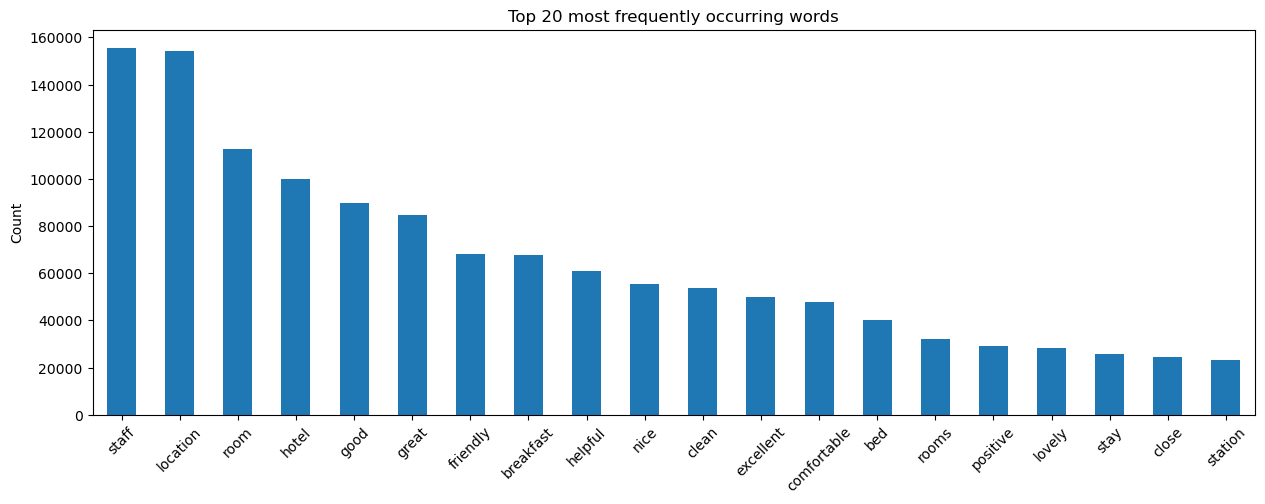

In [45]:
# plotting the top 20 most frequently occurring (positive) words in the transformed train data
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [46]:
# transforming the negative review column of the train data using countvectorizer
bagofwords2 = CountVectorizer(stop_words="english", max_features=500, min_df=10)
bagofwords2.fit(X_train['Negative_Review'])
X_train_transformed2 = bagofwords2.transform(X_train['Negative_Review'])
X_train_transformed2

<412159x500 sparse matrix of type '<class 'numpy.int64'>'
	with 2047199 stored elements in Compressed Sparse Row format>

In [47]:
# transforming the negative review column of the test data using the same vectorizer
X_test_transformed2 = bagofwords2.transform(X_test['Negative_Review'])
X_test_transformed2 

<103040x500 sparse matrix of type '<class 'numpy.int64'>'
	with 508018 stored elements in Compressed Sparse Row format>

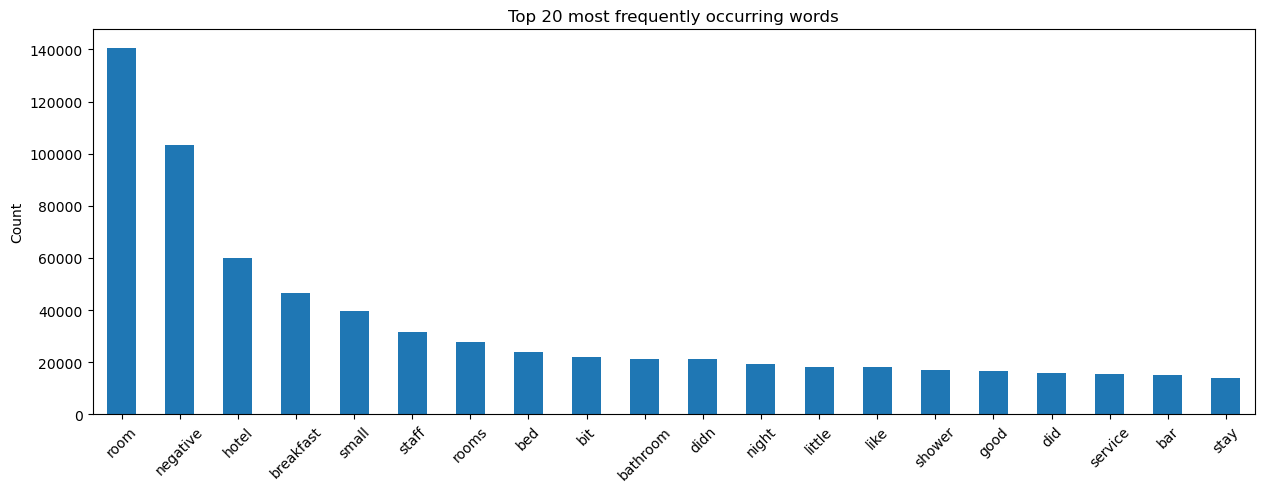

In [48]:
# plotting the top 20 most frequently occurring (negative) words in the transformed train data
word_counts = pd.DataFrame(
    {"counts": X_train_transformed2.toarray().sum(axis=0)},
    index=bagofwords2.get_feature_names_out()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [49]:
# now I need to concatenate the word vector columns with the training and test data, respectively
X_train.shape

(412159, 21)

In [50]:
X_train_transformed.shape

(412159, 500)

In [51]:
X_train_transformed2.shape

(412159, 500)

In [52]:
# there should be 412159 rows and 1021 columns when all of it is concatenated

In [53]:
positive_train_df = pd.DataFrame(X_train_transformed.toarray(), columns=(bagofwords.get_feature_names_out() + '_pos'))

In [54]:
positive_train_df.shape # retained the shape of X_train_transformed when converted to DF

(412159, 500)

In [55]:
negative_train_df = pd.DataFrame(X_train_transformed2.toarray(), columns=(bagofwords2.get_feature_names_out() + '_neg'))

In [56]:
negative_train_df.shape # retained the shape of X_train_transformed2

(412159, 500)

In [57]:
X_train_final = pd.concat([X_train, positive_train_df, negative_train_df], axis=1)

In [58]:
X_train_final.shape

(412159, 1021)

In [59]:
X_train_final.drop(columns=['Negative_Review', 'Positive_Review'], inplace=True)

In [60]:
positive_test_df = pd.DataFrame(X_test_transformed.toarray(), columns=(bagofwords.get_feature_names_out() + '_pos'))

In [61]:
negative_test_df = pd.DataFrame(X_test_transformed2.toarray(), columns=(bagofwords2.get_feature_names_out() + '_neg'))

In [62]:
X_test_final = pd.concat([X_test, positive_test_df, negative_test_df], axis=1)

In [63]:
X_test_final.shape

(103040, 1021)

In [64]:
X_test_final.drop(columns=['Negative_Review', 'Positive_Review'], inplace=True)

## Modelling - Logistic Regression <a class="anchor" id="third-bullet"></a>

As the data is now ready for modelling, we will be creating two separate models with optimization and evaluation of each.

Fit a logistic regression model on the data and analyze the test and train accuracy. Find the top 20 words from the positive reviews that are most predictive of a positive sentiment (Reviewer_Score = 1). Similarly, find the top 20 words from the negative reviews that are most predictive of a negative sentiment (Reviewer_Score = 0). What actionable insights can you draw from these?

In [75]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_final, y_train)

# Training and test score
print(f"Train score: {logreg.score(X_train_final, y_train)}")
print(f"Test score: {logreg.score(X_test_final, y_test)}")

/Users/yael/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train score: 0.7541604089683835
Test score: 0.7526203416149069


In [74]:
logreg.coef_

array([[ 1.60355637e-01, -3.75242350e-02, -7.55962114e-05, ...,
        -2.60416340e-03, -8.77726484e-05,  4.36579369e-04]])

In [69]:
logreg.feature_names_in_

array(['Average_Score', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', ..., 'worth_neg', 'wouldn_neg',
       'wrong_neg'], dtype=object)

In [87]:
pos_coefs = pd.DataFrame(logreg.coef_, columns=logreg.feature_names_in_).T

In [90]:
pos_coefs

,0
10_pos,-0.010827
15_pos,-0.014123
20_pos,-0.012986
24_pos,-0.000224
30_pos,-0.008663
...,...
worked_pos,-0.003911
working_pos,-0.010218
worth_pos,0.001489
year_pos,0.001960


In [89]:
for col in logreg.feature_names_in_:
    if '_pos' not in col:
        pos_coefs.drop(col, inplace=True)

In [102]:
# top 20 positive words most predictive of a positive sentiment
np.abs(pos_coefs[0]).sort_values(ascending=False)[:20]

staff_pos          0.654779
good_pos           0.423160
great_pos          0.416945
excellent_pos      0.371284
positive_pos       0.283385
friendly_pos       0.272230
helpful_pos        0.246156
location_pos       0.216742
lovely_pos         0.188185
amazing_pos        0.181936
hotel_pos          0.158921
comfortable_pos    0.156876
perfect_pos        0.152492
service_pos        0.132714
fantastic_pos      0.129151
stay_pos           0.110254
station_pos        0.109265
close_pos          0.108858
beautiful_pos      0.108102
nice_pos           0.098678
Name: 0, dtype: float64

In [91]:
neg_coefs = pd.DataFrame(logreg.coef_, columns=logreg.feature_names_in_).T

In [94]:
neg_coefs

,0
00_neg,0.005713
10_neg,0.011894
12_neg,0.006666
15_neg,0.006789
20_neg,0.000306
...,...
worn_neg,-0.019364
worst_neg,-0.012654
worth_neg,-0.009626
wouldn_neg,-0.000928


In [93]:
for col in logreg.feature_names_in_:
    if '_neg' not in col:
        neg_coefs.drop(col, inplace=True)

In [103]:
# top 20 negative words most predictive of a negative sentiment (really least predictive of a positive sentiment)
np.abs(neg_coefs[0]).sort_values()[:20]

opened_neg          0.000007
head_neg            0.000044
alarm_neg           0.000053
help_neg            0.000066
fresh_neg           0.000068
disappointed_neg    0.000080
fixed_neg           0.000085
english_neg         0.000106
provided_neg        0.000109
checkout_neg        0.000109
days_neg            0.000119
provide_neg         0.000153
weren_neg           0.000161
rate_neg            0.000181
centre_neg          0.000220
lots_neg            0.000260
club_neg            0.000278
facing_neg          0.000278
information_neg     0.000287
mini_neg            0.000298
Name: 0, dtype: float64

## Modelling - PCA and Decision Tree Classifier Using Pipeline <a class="anchor" id="fourth-bullet"></a>

Using a pipeline, combine PCA with a decision tree classifier.

Optimize at least 3 hyperparameters including the maximum tree depth and the minimum number of data points required on each leaf node.

You can use 20 principle components.

The best parameters should be found using 5-fold cross validation.

Contrast the best results here with the logistic regression model and provide any insights that you may draw from the results.

In [109]:
estimators = [('pca', PCA(n_components=20)),
              ('model', DecisionTreeClassifier(max_depth=1))]

pipe = Pipeline(estimators)

pipe.fit(X_train_final, y_train)

pipe.score(X_test_final, y_test)

0.684083850931677

In [111]:
estimators = [('pca', PCA(n_components=20)),
              ('model', DecisionTreeClassifier())]

pipe = Pipeline(estimators)

param_grid = [{'model__max_depth': list(range(3)),
              'model__min_samples_leaf': [1,2,3]}
]

grid = GridSearchCV(pipe, param_grid, cv=5, verbose=2, n_jobs=-1)
fittedgrid = grid.fit(X_train_final, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


KeyboardInterrupt: 

## Modelling - Model Evaluation <a class="anchor" id="fifth-bullet"></a>

For your best performing model, conduct a more in-depth evaluation by analyzing the confusion matrix and commenting on the model errors and metrics such as precision and recall.

In [ ]:
y_pred = fitted_search.best_estimator_.predict(X_test_final)

cf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
ConfusionMatrixDisplay.from_estimator(fitted_search.best_estimator_, X_test_final, y_test);

## Conclusion <a class="anchor" id="conc"></a>

